In [1]:
import numpy as np
import sys
import os, sys
import matplotlib.pyplot as plt
import xarray as xr
#from xarray import open_mfadataset
import cartopy.crs as crs
import cartopy
from matplotlib.colors import LogNorm
import numpy as np
import cartopy.io.shapereader as shpreader
from cartopy.feature import ShapelyFeature
import cmocean
import matplotlib
#from pathlib import Path4
#edit 12/04
from pathlib import Path
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# from matplotlib import pyplot as plt
import rasterio
from rasterio.plot import show
#try adding
#import cfunits
from pyschism.mesh import Hgrid
import pyschism
from matplotlib.image import imread
import cmcrameri.cm as ccm
from matplotlib.collections import PolyCollection


print("Modules imported!")


Modules imported!


In [2]:
#import Sienna's plotting library
import schism_plot_lib_2025_05_12 as spl
import time

In [3]:
dpi = 100
image_save_dpi = 450
image_format = "tif"

import matplotlib_inline
%matplotlib inline
%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
matplotlib.rcParams["figure.dpi"] = dpi
plt.rcParams['figure.dpi'] = dpi

In [4]:
# Define paths for grid
basemap = '/expanse/lustre/scratch/jisrael/temp_project/fc_esdl_data/plotting/basemap_delta.tif' 

# Define projections 
proj_utm10 = 'EPSG:26910'
global_proj = crs.PlateCarree()

output_folder = '/expanse/lustre/scratch/jisrael/temp_project/Savio_scratch_back_up/Plotting/expanse/high_res_plots'

grid ='/expanse/lustre/scratch/jisrael/temp_project/run_schism/run_2_restart_2018_04_18/hgrid_clean.gr3'

# Open up our grid file as an HGrid Class object (pyschism)
hgrid = Hgrid.open(grid, crs=proj_utm10)


In [5]:
depth=(hgrid.values-hgrid.values.max())*-1
print(np.max(depth))

122.47448594


In [6]:
# #plot the grid
# fig = plt.figure(figsize=(13,15))
# ax = plt.gca()
# climit=[0,120]
# cmap = cmocean.cm.deep
# #imola_r
# args = {'vmin': np.min(depth), 'vmax': np.max(depth)}
# args['cmap'] = cmap
# ax.tripcolor(hgrid.x,hgrid.y,hgrid.triangles,depth,shading='flat',**args,linewidth=0.05,edgecolors='k')
# pc = PolyCollection(hgrid.coords[hgrid.quads], clim=climit, cmap=cmap,linewidth=0.05)
# quad_value = np.mean(depth[hgrid.quads], axis=1)  # THIS IS A CRITICAL STEP ... IT TURNS OUT 
#             #quad_value = np.mean(schism_output.hgrid.quads, axis=1)
# pc.set_array(quad_value)
# # pc.set_edgecolor('face')
# pc.set_edgecolor('k')
# ax.add_collection(pc)
# ax.grid(alpha = 0.25) 
# cbar = plt.colorbar(pc, orientation="horizontal", shrink=0.6,pad=0.03)
# cbar.set_label("Depth (m)")
# #fig.savefig('Whole_domain_grid.png')
# #ax = self.set_domain(domain, ax)
# image_name = "high_res_plots/whole_grid_450dpi"+"."+image_format
# #image_format = "svg"
# #fig.savefig(image_name, format=image_format, dpi=image_save_dpi, transparent=True)

In [7]:
fn = "/expanse/lustre/scratch/jisrael/temp_project/run_schism/run_2_restart_2018_04_18/outputs/"
run = spl.SchismOutput(output_folder=fn)


 Creating run object for results in /expanse/lustre/scratch/jisrael/temp_project/run_schism/run_2_restart_2018_04_18/outputs/ ... 

Found 28066 netcdf files!
Found output for:
	 1 - horizontalVelX
	 2 - horizontalVelY
	 3 - hotstart
	 4 - out2d
	 5 - salinity
	 6 - temperature
	 7 - turbulentKineticEner
	 8 - zCoordinates


In [8]:
#set the time plots will all come from
fno=681
tpoint=47

In [9]:
ds = run.Result(run, variable = "salinity", filenumber=fno)

/expanse/lustre/scratch/jisrael/temp_project/run_schism/run_2_restart_2018_04_18/outputs/salinity_681.nc
Loading in /expanse/lustre/scratch/jisrael/temp_project/run_schism/run_2_restart_2018_04_18/outputs/salinity_681.nc


/home/jisrael/miniconda/envs/geoplot/lib/python3.11/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


Loaded in dataset! 

<xarray.Dataset> Size: 2GB
Dimensions:   (time: 48, nSCHISM_hgrid_node: 471330, nSCHISM_vgrid_layers: 23)
Coordinates:
  * time      (time) datetime64[ns] 384B 2018-11-11T16:30:00 ... 2018-11-12T1...
Dimensions without coordinates: nSCHISM_hgrid_node, nSCHISM_vgrid_layers
Data variables:
    salinity  (time, nSCHISM_hgrid_node, nSCHISM_vgrid_layers) float32 2GB ...
TIME ['2018-11-11T16:30:00.000000000' '2018-11-11T17:00:00.000000000'
 '2018-11-11T17:30:00.000000000' '2018-11-11T18:00:00.000000000'
 '2018-11-11T18:30:00.000000000' '2018-11-11T19:00:00.000000000'
 '2018-11-11T19:30:00.000000000' '2018-11-11T20:00:00.000000000'
 '2018-11-11T20:30:00.000000000' '2018-11-11T21:00:00.000000000'
 '2018-11-11T21:30:00.000000000' '2018-11-11T22:00:00.000000000'
 '2018-11-11T22:30:00.000000000' '2018-11-11T23:00:00.000000000'
 '2018-11-11T23:30:00.000000000' '2018-11-12T00:00:00.000000000'
 '2018-11-12T00:30:00.000000000' '2018-11-12T01:00:00.000000000'
 '2018-11-12T01:30:00

In [10]:
proj_utm10 = 'EPSG:26910'

In [11]:
run.run_dir
run.run_dir / "hgrid.gr3"

PosixPath('/expanse/lustre/scratch/jisrael/temp_project/run_schism/run_2_restart_2018_04_18/hgrid.gr3')

In [12]:
hgrid = Hgrid.open('/expanse/lustre/scratch/jisrael/temp_project/run_schism/run_2_restart_2018_04_18/hgrid_clean.gr3', crs=proj_utm10)

In [13]:
# fig1, ax1 = ds.plot_variable(run, domain="Bay-Delta", time=tpoint, depth= "average", titlestr="Historical Salinity 07/06/2018")
# image_name = "high_res_plots/bay_delta_depth_avg_salinity_450dpi_svg"+"."+image_format

# #fig1.savefig(image_name, format=image_format, dpi=image_save_dpi, transparent=True)

In [14]:
#subtract the historical from the 2C warming
fn2 = "/expanse/lustre/scratch/jisrael/temp_project/run_schism/run_3/outputs"
run2 = spl.SchismOutput(output_folder=fn2)
dtemp2 = run2.Result(run2, variable = "salinity", filenumber=fno)


 Creating run object for results in /expanse/lustre/scratch/jisrael/temp_project/run_schism/run_3/outputs ... 

Found 19980 netcdf files!
Found output for:
	 1 - horizontalVelX
	 2 - horizontalVelY
	 3 - hotstart
	 4 - out2d
	 5 - salinity
	 6 - temperature
	 7 - turbulentKineticEner
	 8 - zCoordinates
/expanse/lustre/scratch/jisrael/temp_project/run_schism/run_3/outputs/salinity_681.nc
Loading in /expanse/lustre/scratch/jisrael/temp_project/run_schism/run_3/outputs/salinity_681.nc
Loaded in dataset! 

<xarray.Dataset> Size: 2GB
Dimensions:   (time: 48, nSCHISM_hgrid_node: 471330, nSCHISM_vgrid_layers: 23)
Coordinates:
  * time      (time) datetime64[ns] 384B 2018-11-11T16:30:00 ... 2018-11-12T1...
Dimensions without coordinates: nSCHISM_hgrid_node, nSCHISM_vgrid_layers
Data variables:
    salinity  (time, nSCHISM_hgrid_node, nSCHISM_vgrid_layers) float32 2GB ...
TIME ['2018-11-11T16:30:00.000000000' '2018-11-11T17:00:00.000000000'
 '2018-11-11T17:30:00.000000000' '2018-11-11T18:00:00

In [15]:
sal1_diff=dtemp2.dataset-ds.dataset

In [16]:
dtemp2.dataset=sal1_diff

In [17]:
# fig2, ax2 = dtemp2.plot_variable(run, domain="Delta", time=tpoint,depth= "average",titlestr="20% decrease in exports - Histoical Salinity 08/06/2018")
# image_name = "high_res_plots/diff_exports_map_Delta"+"."+image_format
# fig2.savefig(image_name, format=image_format, dpi=image_save_dpi, transparent=True)


In [18]:
# fig2, ax2 = dtemp2.plot_variable(run, domain="Bay-Delta", time=tpoint,depth= "average",titlestr="20% decrease in exports - Histoical Salinity 08/06/2018")
# image_name = "high_res_plots/diff_exports_map_Bay-Delta"+"."+image_format
# fig2.savefig(image_name, format=image_format, dpi=image_save_dpi, transparent=True)


In [19]:
# fig2, ax2 = dtemp2.plot_variable(run, domain="Bay-Delta", time="average",depth= "average",titlestr="20% decrease in exports - Histoical Salinity 08/06/2018")

In [20]:
# fig3, ax3 = dtemp2.plot_variable(run, domain="Bay-Delta", time="average",depth= "average",titlestr="20% decrease in exports - Histoical Salinity 08/06/2018")

In [21]:
#subtract the historical from the 2C warming
fn3 = "/expanse/lustre/scratch/jisrael/temp_project/run_schism/run_4/outputs"
run3 = spl.SchismOutput(output_folder=fn3)
dtemp3 = run3.Result(run3, variable = "salinity", filenumber=fno)
sal2_diff=dtemp3.dataset-ds.dataset
dtemp3.dataset=sal2_diff


 Creating run object for results in /expanse/lustre/scratch/jisrael/temp_project/run_schism/run_4/outputs ... 

Found 19468 netcdf files!
Found output for:
	 1 - horizontalVelX
	 2 - horizontalVelY
	 3 - hotstart
	 4 - out2d
	 5 - salinity
	 6 - temperature
	 7 - turbulentKineticEner
	 8 - zCoordinates
/expanse/lustre/scratch/jisrael/temp_project/run_schism/run_4/outputs/salinity_681.nc
Loading in /expanse/lustre/scratch/jisrael/temp_project/run_schism/run_4/outputs/salinity_681.nc
Loaded in dataset! 

<xarray.Dataset> Size: 2GB
Dimensions:   (time: 48, nSCHISM_hgrid_node: 471330, nSCHISM_vgrid_layers: 23)
Coordinates:
  * time      (time) datetime64[ns] 384B 2018-11-11T16:30:00 ... 2018-11-12T1...
Dimensions without coordinates: nSCHISM_hgrid_node, nSCHISM_vgrid_layers
Data variables:
    salinity  (time, nSCHISM_hgrid_node, nSCHISM_vgrid_layers) float32 2GB ...
TIME ['2018-11-11T16:30:00.000000000' '2018-11-11T17:00:00.000000000'
 '2018-11-11T17:30:00.000000000' '2018-11-11T18:00:00

In [22]:
# fig4, ax4 = dtemp3.plot_variable(run, domain="Delta", time=tpoint, depth= "average",titlestr="20% increase in Sac flow - Historical Salinity 08/06/2018")
# image_name = "high_res_plots/diff_sacriver_map_Delta"+"."+image_format
# fig4.savefig(image_name, format=image_format, dpi=image_save_dpi, transparent=True)


In [23]:
#fig5, ax5 = dtemp3.plot_variable(run, domain="Bay-Delta", time="average",depth= "average",titlestr="20% increase in Sac flow - Historical Salinity 08/06/2018")


In [24]:
sal3_diff=dtemp3.dataset-dtemp2.dataset #increased inflows minus decreased exports
dtemp3.dataset=sal3_diff

Taking slice at time  ... 
Model is at time = Nov 12 2018, 16:00
Taking depth average ... 
Loaded in hgrid.gr3 file...

Domain = Delta
/expanse/lustre/scratch/jisrael/temp_project/Savio_scratch_back_up/Plotting/expanse


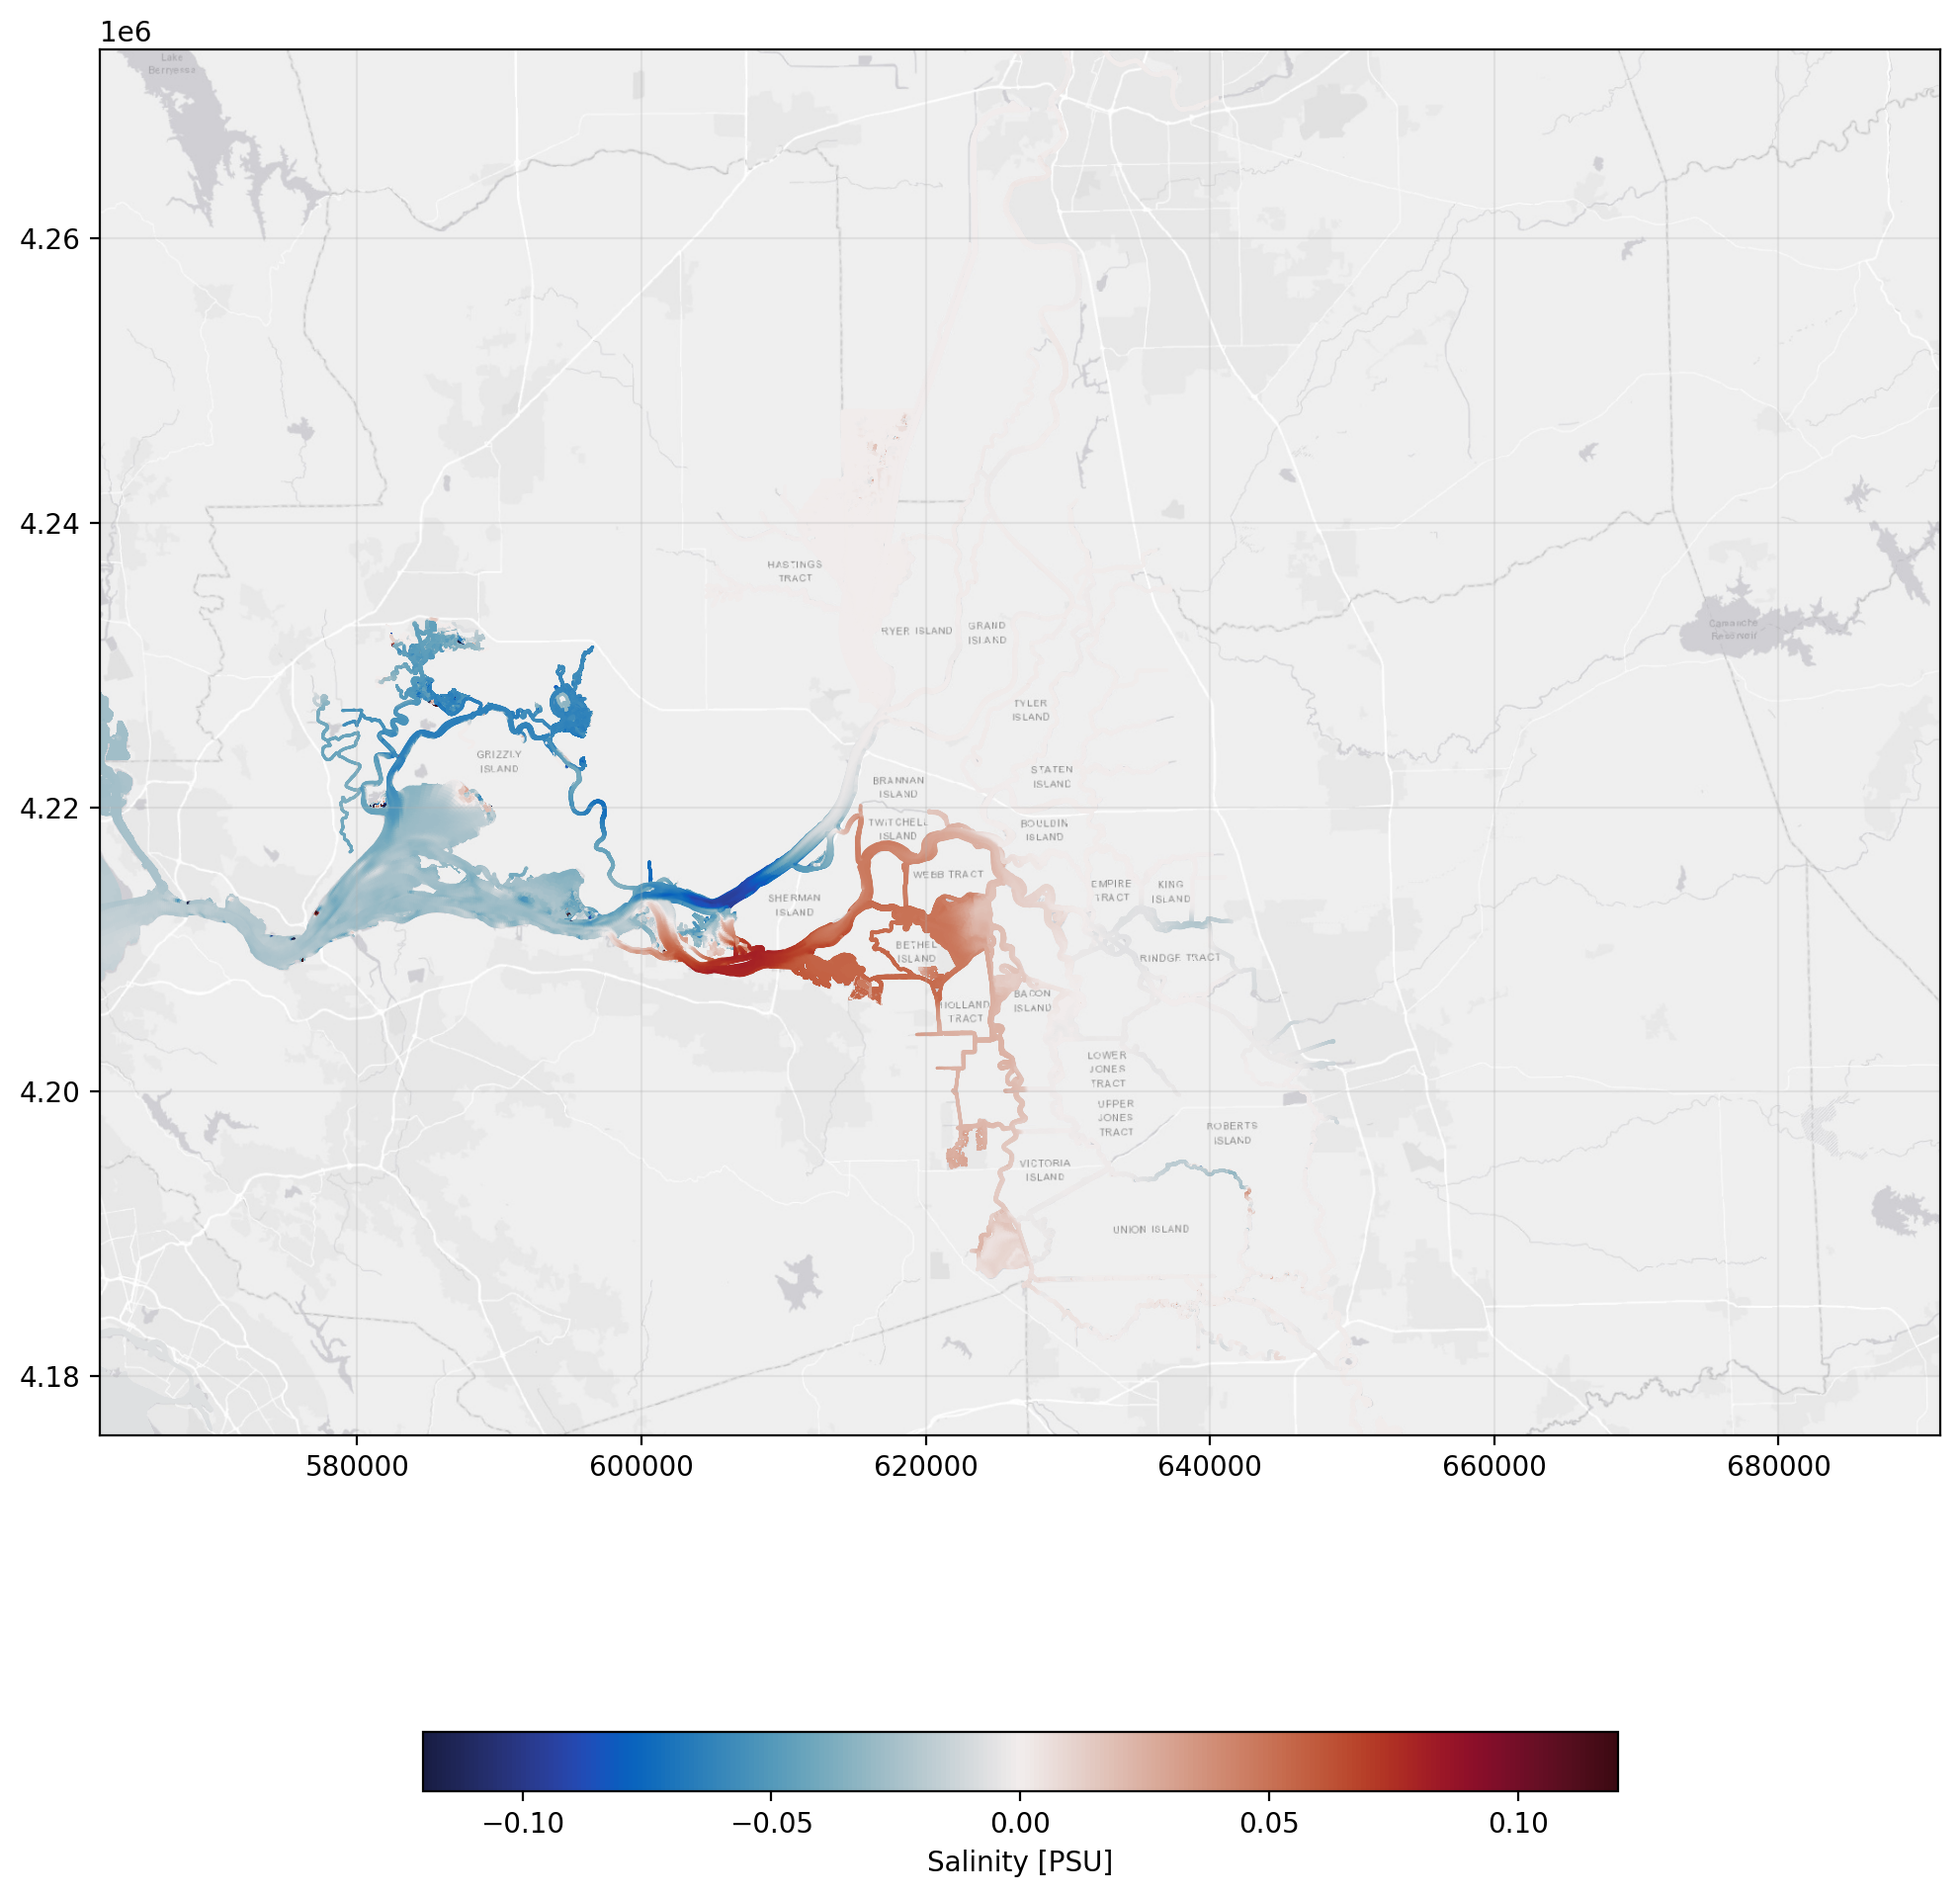

In [25]:
fig6, ax6 = dtemp3.plot_variable(run, domain="Delta", time=tpoint,depth= "average",titlestr="20% increase in Sac flow - 20% decrease in exports")
image_name = "high_res_plots/diff_sacriver_and_exports_map_Delta"+"."+image_format
fig6.savefig(image_name, format=image_format, dpi=image_save_dpi, transparent=True)
